## Last Edited: 1/8/21

In [1]:
import pandas as pd
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import scipy.stats as ss
from nilearn import image, input_data
from scipy.stats import pearsonr
import os

In [8]:
dataset_csv = "mgh_scores.csv"
target_network_file = "vlsm_acute.nii"
output_dir = "template_palm_acute"
VOI = 'NIHSS'

clean_df = pd.read_csv(dataset_csv)
clean_df.dropna(how='any', subset=[VOI],inplace=True)

input_imgs = clean_df['filenames']

In [9]:
target_network = np.array(image.load_img(target_network_file).dataobj)
NDS_all=[]
NDS_pos_only=[]
NDS_neg_only=[]

NDS_all_avg=[]
NDS_pos_only_avg=[]
NDS_neg_only_avg=[]

In [10]:
for i in input_imgs:
    img = ni.load(i)
    data = np.array(img.dataobj)
    pos = []
    neg = []
    tot = []
    for x in range(len(data)):
        for y in range(len(data[x])):
            for z in range(len(data[x][y])):
                if data[x, y, z] > 0:
                    tot.append(target_network[x, y, z])
                    if target_network[x, y, z] > 0:
                        pos.append(target_network[x, y, z])
                    if target_network[x, y, z] < 0:
                        neg.append(target_network[x, y, z])
    NDS_all.append(np.sum(np.array(tot)))
    NDS_pos_only.append(np.sum(np.array(pos)))
    NDS_neg_only.append(np.sum(np.array(neg)))
    NDS_all_avg.append(np.mean(np.array(tot)))
    if len(pos) > 0:
        NDS_pos_only_avg.append(np.mean(np.array(pos)))
    else:
        NDS_pos_only_avg.append(0)
    if len(neg) > 0:
        NDS_neg_only_avg.append(np.mean(np.array(neg)))
    else:
        NDS_neg_only_avg.append(0)

In [11]:
clean_df['NDS_all']=NDS_all
clean_df['NDS_pos']=NDS_pos_only
clean_df['NDS_neg']=NDS_neg_only

clean_df['NDS_all_avg']=NDS_all_avg
clean_df['NDS_pos_avg']=NDS_pos_only_avg
clean_df['NDS_neg_avg']=NDS_neg_only_avg

NDS-sum using all values: r and p-value = (0.5394876424424896, 1.6107007063023934e-34)
NDS-sum using pos values: r and p-value = (0.5394876413421256, 1.6107012989192803e-34)
NDS-sum using neg values: r and p-value = (nan, nan)


/cluster/2021ahussain/.local/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


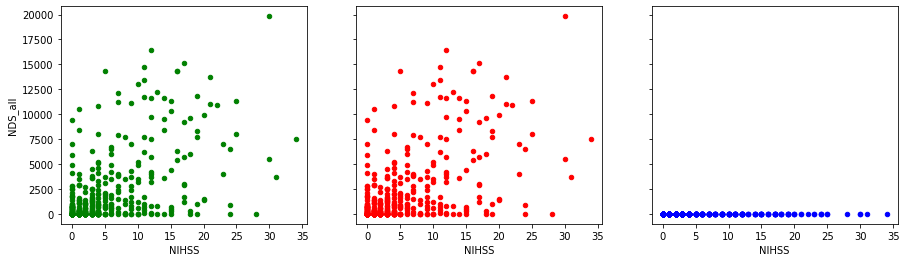

NDS-mean using all values: r and p-value = (-0.020345326118998527, 0.6707560892247055)
NDS-mean using pos values: r and p-value = (0.25168235068683237, 9.06329215066397e-08)
NDS-mean using neg values: r and p-value = (nan, nan)


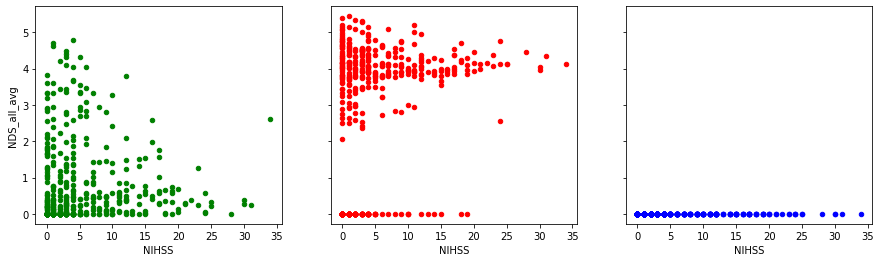

In [12]:
print("NDS-sum using all values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_all']))
print("NDS-sum using pos values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_pos']))
print("NDS-sum using neg values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_neg']))

fig, axs = plt.subplots(1,3,sharey=True,sharex=True)
fig.set_size_inches(15,4)
clean_df.plot(kind='scatter',x=VOI,y='NDS_all',color='green',ax=axs[0])
clean_df.plot(kind='scatter',x=VOI,y='NDS_pos',color='red',ax=axs[1])
clean_df.plot(kind='scatter',x=VOI,y='NDS_neg',color='blue',ax=axs[2])
plt.show()
    
print("NDS-mean using all values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_all_avg']))
print("NDS-mean using pos values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_pos_avg']))
print("NDS-mean using neg values: r and p-value =",
    pearsonr(clean_df[VOI],clean_df['NDS_neg_avg']))
    
fig, axs = plt.subplots(1,3,sharey=True,sharex=True)
fig.set_size_inches(15,4)
clean_df.plot(kind='scatter',x=VOI,y='NDS_all_avg',color='green',ax=axs[0])
clean_df.plot(kind='scatter',x=VOI,y='NDS_pos_avg',color='red',ax=axs[1])
clean_df.plot(kind='scatter',x=VOI,y='NDS_neg_avg',color='blue',ax=axs[2])
plt.show()
clean_df.to_csv(os.path.join(output_dir,'NDS_results.csv'), index=False)

In [13]:
clean_df

,subject,mRS,NIHSS,filenames,NDS_all,NDS_pos,NDS_neg,NDS_all_avg,NDS_pos_avg,NDS_neg_avg
0,1,0,2.0,mgh_lesions/subject001.nii,0.000000,0.000000,0.0,0.000000,0.000000,0
1,2,1,7.0,mgh_lesions/subject002.nii,2197.107178,2197.106934,0.0,3.334002,4.376707,0
2,3,6,31.0,mgh_lesions/subject003.nii,3666.080078,3666.080322,0.0,0.246476,4.359192,0
3,4,1,2.0,mgh_lesions/subject004.nii,0.000000,0.000000,0.0,0.000000,0.000000,0
4,5,1,1.0,mgh_lesions/subject005.nii,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
436,486,1,4.0,mgh_lesions/subject486.nii,0.000000,0.000000,0.0,0.000000,0.000000,0
437,487,0,1.0,mgh_lesions/subject487.nii,0.000000,0.000000,0.0,0.000000,0.000000,0
438,488,6,15.0,mgh_lesions/subject488.nii,4401.802246,4401.802734,0.0,0.756323,4.244747,0
439,489,0,0.0,mgh_lesions/subject489.nii,434.897247,434.897278,0.0,1.666273,3.319827,0
